In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import sys

from itertools import accumulate

sys.path.append('..')
np.random.seed(12345)
pd.set_option('display.max_colwidth', -1)

In [15]:
df = pd.read_json("../sentiment/data/kindle_reviews.json", lines=True)

# Check for null values
df.info()

In [5]:
# Remove irrelevant columns 
df = df[["reviewText", "overall", "summary"]]
# Merge the two text columns
df["text"] = df.apply(lambda row: "{}. {}".format(row["summary"], row["reviewText"]), axis=1)

# Add two new columns corresponding to the number of words of each reviewText and summary and display their stats
df['reviewText_wordn'] = df['reviewText'].apply(lambda x:len(x.split()))
df['summary_wordn'] = df['summary'].apply(lambda x:len(x.split()))
df['text_wordn'] = df['text'].apply(lambda x:len(x.split()))
df[["summary_wordn", "reviewText_wordn", "text_wordn"]].describe()

,summary_wordn,reviewText_wordn,text_wordn
count,982619.000000,982619.000000,982619.000000
mean,4.002230,109.902263,113.904494
std,2.878757,130.813204,131.649819
min,0.000000,0.000000,1.000000
25%,2.000000,33.000000,36.000000
50%,3.000000,62.000000,66.000000
75%,5.000000,130.000000,135.000000
max,43.000000,4385.000000,4394.000000


It's apparent from the max values above, that we might have some anamolies in the reviewText column in terms of the word count, although the summary column does suffer from values 10+ std away from the mean, yet they 
are within the acceptable ranges.

*Note**: Both the summary and reviewText columns does have empty strings, but the merged text doesn't.

Boxplots and density distributions should give us more insight on the distribution of length among the review and summary texts.


In [6]:
# Let's inspect some of the anomalies on both ends 
df[df["text_wordn"] <= 5].sample(21, random_state=12)

,reviewText,overall,summary,text,reviewText_wordn,summary_wordn,text_wordn
292008,Love it!,5,Five Stars,Five Stars. Love it!,2,2,4
26999,Very helpful,5,get it get,get it get. Very helpful,2,3,5
160543,was okay,3,Three Stars,Three Stars. was okay,2,2,4
512239,Great book!,5,Great book.,Great book.. Great book!,2,2,4
957080,Great story!!,5,Five Stars,Five Stars. Great story!!,2,2,4
509260,very good,5,Five Stars,Five Stars. very good,2,2,4
886967,Very cute,4,Four Stars,Four Stars. Very cute,2,2,4
343341,Very good read.,5,Five Stars,Five Stars. Very good read.,3,2,5
826252,Very good reading.,5,Five Stars,Five Stars. Very good reading.,3,2,5
857962,Fresh and funny.,5,Five Stars,Five Stars. Fresh and funny.,3,2,5


In [8]:
df[df["text_wordn"] >= 300].sample(15, random_state=12)

,reviewText,overall,summary,text,reviewText_wordn,summary_wordn,text_wordn
376716,"Stevie is a man in his mid-thirties. His one obvious vice in life is a taste for young, barely legal girls. The way Stevie sees it, if a girl reaches the age of consent&#8212;age 16 in his neck of the woods&#8212;she&#8217;s fair game.When Stevie meets the young Jessie, he begins to plot and scheme to make the girl his own. However, after meeting the sixteen-year-old girl&#8217;s parents, it becomes clear they do not like the middle-aged Romeo&#8217;s intentions toward their daughter. Realizing this won&#8217;t be the easy conquest he imagined, Stevie finds solace in his former love interest Jill, who at twenty-one years of age, is too old for Stevie&#8217;s tastes.But Jessie is a stubborn girl. She refuses to allow her father final say where her budding love life is concerned. Cracks begin to appear almost immediately as the relationship begins its ascent. Damaged Girls is a well-written documentation of that which is all too commonplace in our society: One person taking advantage of another for selfish motives. Author Janice G. Ross explores the subject to its very core, bringing to light these character traits that seem to permeate the human race.Ross presents a great study of characters on both sides of this complicated fence, showing that even the victim in this isn&#8217;t really as innocent as one might think. And while the reader certainly won&#8217;t feel sorry for the predatory Stevie, the author manages to paint the man as human rather than monster. He has friends who care about him, particularly the story&#8217;s narrative voice, a woman named Morgan. But friend or not, Morgan&#8217;s goal is to protect the young girl, keeping her from the snare of Stevie&#8217;s web. But Morgan just might be too late.Damaged Girls by Janice Ross is a good, solid read; dark at ties, but quite the page-turner.",5,A Solid Read,"A Solid Read. Stevie is a man in his mid-thirties. His one obvious vice in life is a taste for young, barely legal girls. The way Stevie sees it, if a girl reaches the age of consent&#8212;age 16 in his neck of the woods&#8212;she&#8217;s fair game.When Stevie meets the young Jessie, he begins to plot and scheme to make the girl his own. However, after meeting the sixteen-year-old girl&#8217;s parents, it becomes clear they do not like the middle-aged Romeo&#8217;s intentions toward their daughter. Realizing this won&#8217;t be the easy conquest he imagined, Stevie finds solace in his former love interest Jill, who at twenty-one years of age, is too old for Stevie&#8217;s tastes.But Jessie is a stubborn girl. She refuses to allow her father final say where her budding love life is concerned. Cracks begin to appear almost immediately as the relationship begins its ascent. Damaged Girls is a well-written documentation of that which is all too commonplace in our society: One person taking advantage of another for selfish motives. Author Janice G. Ross explores the subject to its very core, bringing to light these character traits that seem to permeate the human race.Ross presents a great study of characters on both sides of this complicated fence, showing that even the victim in this isn&#8217;t really as innocent as one might think. And while the reader certainly won&#8217;t feel sorry for the predatory Stevie, the author manages to paint the man as human rather than monster. He has friends who care about him, particularly the story&#8217;s narrative voice, a woman named Morgan. But friend or not, Morgan&#8217;s goal is to protect the young girl, keeping her from the snare of Stevie&#8217;s web. But Morgan just might be too late.Damaged Girls by Janice Ross is a good, solid read; dark at ties, but quite the page-turner.",303,3,306
926590,"I fell in love with Jus when I devoured RUINED and let me tell you&#8230;I fell in love all over again with RULES OF SURVIVAL. She has a way of enthralling readers. She keeps them captivated with

We hypothesize that for long reviews, the parts that contains the core sentiment of the reviewer towards the book are the beginning and/or the ending portions of the review, let's test this hypothesis by sampling from both ends of the reviews and checking the distribution of the sentimental words on both ends. 

In [10]:
samples = df[df["text_wordn"] >= 300].sample(15, random_state=12)
samples["last_50words"] = samples['text'].apply(lambda x:" ".join(x.split()[-50:]))
samples["first_50words"] = samples['text'].apply(lambda x:" ".join(x.split()[:50]))

samples[["overall","first_50words", "last_50words"]]


,overall,first_50words,last_50words
376716,5,"A Solid Read. Stevie is a man in his mid-thirties. His one obvious vice in life is a taste for young, barely legal girls. The way Stevie sees it, if a girl reaches the age of consent&#8212;age 16 in his neck of the woods&#8212;she&#8217;s fair game.When Stevie meets the young","story&#8217;s narrative voice, a woman named Morgan. But friend or not, Morgan&#8217;s goal is to protect the young girl, keeping her from the snare of Stevie&#8217;s web. But Morgan just might be too late.Damaged Girls by Janice Ross is a good, solid read; dark at ties, but quite the page-turner."
926590,4,I fell in love with Jus when I devoured RUINED and let me .... I fell in love with Jus when I devoured RUINED and let me tell you&#8230;I fell in love all over again with RULES OF SURVIVAL. She has a way of enthralling readers. She keeps them captivated,"between the main characters. Basically, I loved everything about this book.It was calculating, mysterious, and at times down right funny. Jus Accardo&#8217;s writing style is very unique and so far I have loved everything I have read by her. I look forward to many more amazing stories by Jus Accardo."
307338,4,"Becoming Jolie. When Jolie decides to complete her thesis by investigating the disappearances of children and sightings of ghosts in the town of Folette, Louisianna, she hasn't a clue the effects this small town will have on her. As she gets further embroiled in the quest to find out what","rightness with the world settle around her.There are many key players in ""Becoming Jolie"" that have important roles to play within the pages of the novel. Each has a link to the missing children and some links are more sinister than others.Very Intriguing Novel!**Review copy courtesy of Original Publisher CHBB."
256627,5,Heartbreaking!. ***Contains spoilers if you have not read Throne of Glass*****This occurs right before Celaena is captured and sent to the mines.Celaena and Sam want to escape the city and leave the Guild of Assassins with the blessing of Arobynn. But the price Arobynn wants for them will almost clean,"when she finds out who betrayed her! I hope she guts him like a fish! I definitely recommend this story, but think it's better read after Throne of Glass. Celaena comes across as a bit spoiled in this and I think we see the real Celaena in Throne of Glass."
285535,3,"HOT Read. A small town, the town's golden boy, and a girl from the wrong side of the tracks, can only amount to trouble especially when love is involved.Zuri's middle name should have be trouble. From early on, people misunderstood her and judged her by the actions of her stepfather.","to read. The sex scenes are plentiful and vital to the emotional growth of the couple, but also extremely steamy and well worth the read. I would definitely recommend this to fans of alpha male cowboys with big appetites in and out of the bedroom!Originally posted at LAS Erotic Reviews"
23539,5,"Time to Kill. Mindy McLaurin is in jail on embezzlement charges. Coming from her background, she is totally out of her element. She claims her innocence as do most inmates, but the only one to believe her is Counselor Stone.Prior to Mindy's incarceration, Alexis died suspiciously while in jail. Her","it-Killing Time. A very creative title for a very creative story! Although this is my first book by K. Dawn Byrd, it won't be my last! A definite 4.5 out of 5.0!This e-book was provided by K. Dawn Byrd in exchange for my honest review. No monetary compensation was exchanged."
874920,4,"I'm excited to start book two, to know what's next and what would Jocelyn do. I love to read about Jocelyn and Jackson.. I'm excited to start book two, to know what's next and what would Jocelyn do. I love to read about Jocelyn and Jackson, about their friends and",differences between two eras and ask myself all these questions.Now as this story has ended I want more and I'm waiting to see what's next.I have received this book free 

In [11]:
""" 
Normalizing and stemming the text prior to running the word counters to normalize all the morphemes of a 
word to their root stem, so that the calculations are more accurate and feasible.
"""
from sentiment.input_utils import normalize, stem
print("Normalizing")
df["norm_text"] = df["text"].apply(lambda text: stem(normalize(text)))
print("Stemming")
df["stem_norm_text"] = df["norm_text"].apply(lambda text: stem(text))
df["stemmed_text_wordn"] = df["stem_norm_text"].apply(lambda x: len(x.split()))

Normalizing
Stemming


In [12]:
from collections import Counter
SEGMENT_LENGTH = 64
first_counter = Counter()
last_counter = Counter()

for i, row in df.iterrows():
    words = row["stem_norm_text"].split()
    # Counting for sentences of more than or equal 2 * SEGMENT_LENGTH words to prevent intersections
    if len(words)  >= SEGMENT_LENGTH * 2:
        first_counter.update(words[:SEGMENT_LENGTH])
        last_counter.update(words[-1*SEGMENT_LENGTH:])


In [9]:
first_counter.most_common(100), last_counter.most_common(100)

([('.', 1163711),
  ('the', 759017),
  (',', 624028),
  ('a', 539431),
  ('and', 497363),
  ('i', 468878),
  ('to', 407592),
  ('of', 356436),
  ('is', 300701),
  ('thi', 295147),
  ('book', 263848),
  ('it', 250803),
  ('in', 248451),
  ('!', 195447),
  ('wa', 189314),
  ('that', 185877),
  ('read', 161027),
  ('for', 158664),
  ('stori', 143421),
  ('with', 139739),
  ('her', 128024),
  ('love', 122129),
  ('but', 111920),
  ('you', 105076),
  ('she', 98224),
  ('have', 94027),
  (';', 91413),
  ('as', 86558),
  ('not', 86346),
  ('on', 85334),
  ('one', 83600),
  ('be', 80078),
  ('an', 77445),
  ('my', 75994),
  ('so', 75167),
  ('by', 73667),
  ('from', 70953),
  ('ha', 70610),
  ('me', 68500),
  ('are', 67764),
  ('seri', 67453),
  ('like', 64265),
  ('he', 64068),
  ('about', 58649),
  ('first', 58346),
  ('what', 58102),
  ('hi', 56474),
  ('all', 55809),
  ('charact', 55689),
  ('just', 52663),
  ('at', 52266),
  ('when', 50935),
  ('good', 50155),
  ('great', 49662),
  ('revi

From the distribution of sentimental words on both portions of a review, it's apparent that both the ending and beginning contains very similar density of sentimental words, yet for the word `recommend`, the ending portion contains almost 10 X occurences than the beginning. Which seems natural to the book/movies reviews domain, where the users start with an introduction, core critique and eventually a conclusion with a personal recommendation.

In [13]:
sentimental_words = ["like", "hate", "recommend", "love", "good", "great", "fantastic", "lame",
                     "bad", "exciting", "interesting", "awesome", "waste", "disappointing"]
stemmed_sentimental_words = [stem(word) for word in sentimental_words]
print("{}: {}  -  {}".format("Word", "# beginning occurences", "# ending occurences"))
for word in stemmed_sentimental_words:
    print("{}: {}  -  {}".format(word, first_counter[word], last_counter[word]))

Word: # beginning occurences  -  # ending occurences
like: 64265  -  71279
hate: 4825  -  3987
recommend: 5884  -  50886
love: 122129  -  98031
good: 50155  -  47200
great: 49662  -  44635
fantast: 7227  -  4757
lame: 126  -  140
bad: 11200  -  9113
excit: 8163  -  6734
interest: 19233  -  18842
awesom: 7642  -  5009
wast: 1115  -  1757
disappoint: 8854  -  8855


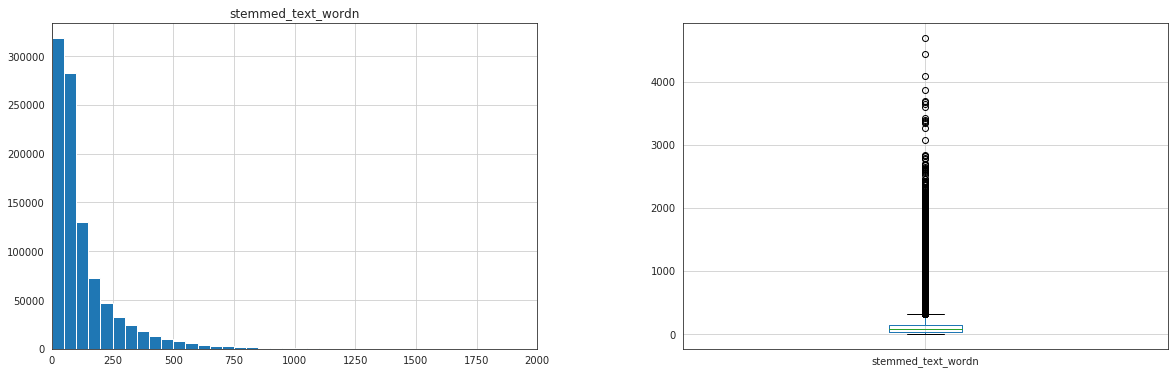

In [26]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
ax1.set_xlim([0, 2000])
ax2 = plt.subplot(1,2,2)

df[['stemmed_text_wordn']].hist(ax=ax1, bins=list(range(0,5000,50)))
df[['stemmed_text_wordn']].boxplot(ax=ax2)

Now let's move to the analysis of the class distribution, since the task is to classify input text to either one of these three classes, Negative (0 <= score < 3), Mixed (3 <= score < 4), Positive (4 <= score <= 5).

In [29]:
def group_scores(score):
    """Transforms the overall score to one of three classes"""
    score_to_class_map = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
    return score_to_class_map[score]

df['normalized_overall'] = df['overall'].apply(group_scores)


[0 1 2] [0.05815886 0.09789552 0.84394562]


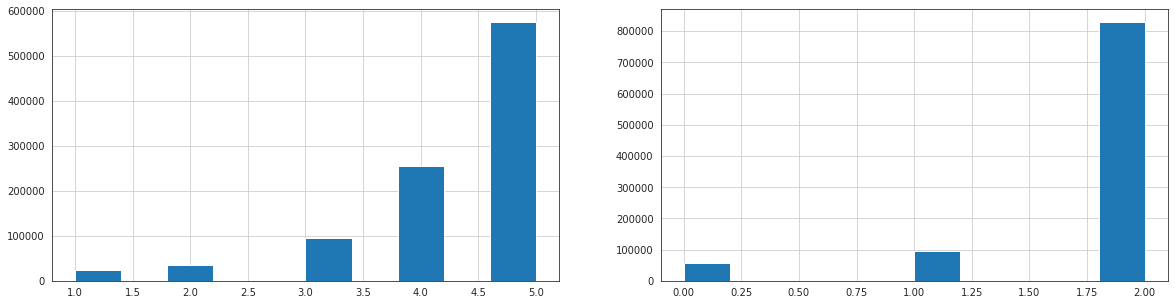

In [30]:
plt.figure(figsize=(20,5))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
df['overall'].hist(ax=ax1)
df['normalized_overall'].hist(ax=ax2)

classes, counts = np.unique(df['normalized_overall'], return_counts=True)
precentages = counts /len(df)
print(classes, precentages)

It's obvious from the class distributions above that the data is heavily unbalanced, approx 85% of the data is positive, while the rest two classes constitues approx. less than 15% of the data. 

This requires careful considerations of our training method and learning algorithm so that we avoid biasing our model towards the positive class.

In [31]:
# Check the distribution of lengths for each class
df[['stemmed_text_wordn', 'normalized_overall']].groupby('normalized_overall').describe()

stemmed_text_wordn                                     \
                                count        mean         std  min   25%   
normalized_overall                                                         
0                   57148.0            123.072059  150.402401  4.0  40.0   
1                   96194.0            139.392675  160.979041  4.0  41.0   
2                   829277.0           129.378146  148.696268  2.0  42.0   

                                         
                     50%    75%     max  
normalized_overall                       
0                   71.0  142.0  3861.0  
1                   77.0  172.0  4437.0  
2                   75.0  152.0  4696.0

In [32]:
# Check the effect of normalization and stemming on the number of unique words 
# This is crucial for BOW-features based classifiers to reduce the dimensionality of the input features
unique_words = set()
unique_stem_words = set()
for i, row in df.iterrows():
    unique_words.update(row["text"].split())
    unique_stem_words.update(row["stem_norm_text"].split())
    
print("unique words (no stemming): {} \nunique normalized stem words: {}".format(len(unique_words), len(unique_stem_words)))

unique words (no stemming): 1948800 
unique normalized stem words: 224699


In [ ]:
# Save the normalized / stemmed dataframe 
df.to_csv("../sentiment/data/normalized_stemmed_df.csv")

In [3]:
from sentiment.input_utils import trim_from_middle
TRIMMED_LENGTH = 200
df = pd.read_csv("normalized_stemmed_df.csv")
df["stem_norm_text"] = df["stem_norm_text"].apply(trim_from_middle, args=(TRIMMED_LENGTH, ))
df["stem_norm_text"] = df["stem_norm_text"].apply(lambda x: " ".join(x))


# Traditional Machine Learning Classification models

In the following section we will train four classification models on 70% of the data as training and eventually report the results on the left-out 30% testing set. Prior to training the classification models we will train a MNB as a baseline without any hyper-parameter tunning. Note that the data split is stratified to preseve the class distribution in the resulting splits.

## Feature set 
Due to memory constraints on my local machine (16 GB) and the relatively big dataset size, and based on the analysis above, we will only work on a trimmed version of the reviewes by extracting the first and last 64 words of each review to reduce the memory usage. Also neither SKlearn's CounterVectorizer nor TFIDFVectorizers would work, thus I have used a Hashing vectorizer which reduces the memory consumption significantly but doesn't allow the exclusion of some of the words that are too rare (small document frequency) or too common (big document frequency) as in the TFIDF. Yet we will attempt to use L1 regulariztion on LR to train our model in excluding the count of the words that are deemed insignificant by the classifier during training. 

## Cross Validation for hypter-parameter tunning
For each classifier we will tune its' relevant hyper-parameters on a 5 StratifiedKFold (due to data imbalance we are using a Stratified kfold), and choose the best parameters according to the average `macro f1-score` over the 5 folds. The macro f1-score is choosen since it gives each class an equal weight, regardless of the number of samples it has in the dataset. `macro` averaging is usually used when each class is weighted equal based on the problem domain and the use-case, and since I am assuming equal importance to each class, this is the metric I have opted for.

## Classifiers  

### Multinomial-Naive-Bayes
For the multinomial Naive Bayes classification model we will run a gridsearch cross-validation to tune the alpha and the fit_prior param, when the fit_prior is set to false, it's aimed to reduce the effect of class imbalance in the dataset on the prior to reduce the bias.

### Logistic Regression 
To handle class imbalance in the LR classifier, the class_weight parameter is used to balance out the classes by adjusting the weights inversely proportional to class frequencies in the input data. Also an L1 regularization is used to eliminate the irrelevant words for the classification tasks in our sparse input features. An one vs rest classifier is trained for each class and a hyper-parameter tunning is ran on the `C` parameter of the regularization strength. 

### LinearSVC
Similar to the Logistic Regression setup

### Voting Ensemble
A hard and soft voting ensemble is trained using the three classifiers above with the best hyper-parameters resuling from the hyper-parameter tunning. Since the LinearSVC sklearn class doesn't support outputting probabilities,  a CalibratredClassifier is trained on top of it 



In [5]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
# Split the dataset in two equal parts
df['normalized_overall_int'] = df['normalized_overall'].apply(lambda x: {'Positive':2, 'Negative':0, 'Neutral':1}[x])
X_train, X_test, y_train, y_test = train_test_split(
    df['stem_norm_text'], df['normalized_overall_int'], test_size=0.3, random_state=12)
del df
Stratified_kfolds = StratifiedKFold(5)
preprocessing_pipeline = HashingVectorizer(analyzer="word", ngram_range=(1,3), 
                                           alternate_sign=False, n_features=2**20)

X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

print("Training Data Shape : {}".format(X_train.shape))
print("Testing Data Shape : {}".format(X_test.shape))

Training Data Shape : (687833, 1048576)
Testing Data Shape : (294786, 1048576)


In [4]:
from sklearn.naive_bayes import MultinomialNB

print("Training baseline Multinomia Naive Bayes")
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_predicted = MNB.predict(X_test)
print(classification_report(y_test, y_predicted))

Training baseline Multinomia Naive Bayes
              precision    recall  f1-score   support

           0       0.63      0.01      0.03     16984
           1       0.65      0.01      0.02     28888
           2       0.85      1.00      0.92    248914

    accuracy                           0.85    294786
   macro avg       0.71      0.34      0.32    294786
weighted avg       0.81      0.85      0.78    294786



In [9]:
def tune_and_test(clf, hyper_parameters):
    # Set the parameters by cross-validation

    clf = GridSearchCV(clf, hyper_parameters, cv=Stratified_kfolds, verbose=1,
                           scoring='f1_macro', n_jobs=1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on testing set:")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    return clf.best_estimator_


In [6]:
hyper_parameters = [{'alpha':[.01,.2,.5, 1, 2], 
                     'fit_prior':[True, False],
                    }]
MNB = MultinomialNB()
tune_and_test(MNB, hyper_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


Best parameters set found on development set:

{'alpha': 0.2, 'fit_prior': False}

Grid scores on development set:

0.607 (+/-0.004) for {'alpha': 0.01, 'fit_prior': True}
0.688 (+/-0.003) for {'alpha': 0.01, 'fit_prior': False}
0.545 (+/-0.004) for {'alpha': 0.2, 'fit_prior': True}
0.689 (+/-0.003) for {'alpha': 0.2, 'fit_prior': False}
0.371 (+/-0.002) for {'alpha': 0.5, 'fit_prior': True}
0.581 (+/-0.004) for {'alpha': 0.5, 'fit_prior': False}
0.312 (+/-0.002) for {'alpha': 1, 'fit_prior': True}
0.397 (+/-0.003) for {'alpha': 1, 'fit_prior': False}
0.305 (+/-0.000) for {'alpha': 2, 'fit_prior': True}
0.316 (+/-0.001) for {'alpha': 2, 'fit_prior': False}

Detailed classification report on testing set:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66     16984
           1       0.39      0.69      0.50     28888
           2       0.97      0.89      0.93    248914

    accuracy                           0.85    294786
   macro avg   

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=False)

In [8]:
from sklearn.linear_model import LogisticRegression

hyper_parameters = [{'C':[.2, .4, .8, 1],
                     'multi_class': ['ovr']
                    }]
lr = LogisticRegression(penalty="l1", class_weight='balanced')
best_MNB = tune_and_test(lr, hyper_parameters)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/media/ragabov/Data/work/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 72.5min finished


Best parameters set found on development set:

{'C': 1, 'multi_class': 'ovr'}

Grid scores on development set:

0.705 (+/-0.002) for {'C': 0.2, 'multi_class': 'ovr'}
0.716 (+/-0.003) for {'C': 0.4, 'multi_class': 'ovr'}
0.724 (+/-0.003) for {'C': 0.8, 'multi_class': 'ovr'}
0.725 (+/-0.003) for {'C': 1, 'multi_class': 'ovr'}

Detailed classification report on testing set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71     16984
           1       0.52      0.54      0.53     28888
           2       0.96      0.95      0.95    248914

    accuracy                           0.89    294786
   macro avg       0.71      0.75      0.73    294786
weighted avg       0.90      0.89      0.90    294786



In [13]:
from sklearn.svm import LinearSVC
hyper_parameters = [{'penalty':['l1', 'l2'], 
                     'C':[.2, .5, .8, 1.1]
                    }]

svc = LinearSVC(class_weight="balanced", dual=False)
tune_and_test(svc, hyper_parameters)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.2, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.2, penalty=l1, score=0.719, total= 8.2min
[CV] C=0.2, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.2min remaining:    0.0s


[CV] ................... C=0.2, penalty=l1, score=0.719, total= 9.4min
[CV] C=0.2, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.5min remaining:    0.0s


[CV] ................... C=0.2, penalty=l1, score=0.720, total= 8.6min
[CV] C=0.2, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 26.1min remaining:    0.0s


[CV] ................... C=0.2, penalty=l1, score=0.724, total= 9.0min
[CV] C=0.2, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 35.1min remaining:    0.0s


[CV] ................... C=0.2, penalty=l1, score=0.719, total= 8.3min
[CV] C=0.2, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 43.4min remaining:    0.0s


[CV] ................... C=0.2, penalty=l2, score=0.728, total= 7.4min
[CV] C=0.2, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 50.8min remaining:    0.0s


[CV] ................... C=0.2, penalty=l2, score=0.726, total= 7.0min
[CV] C=0.2, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 57.8min remaining:    0.0s


[CV] ................... C=0.2, penalty=l2, score=0.726, total= 7.3min
[CV] C=0.2, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 65.0min remaining:    0.0s


[CV] ................... C=0.2, penalty=l2, score=0.732, total= 6.7min
[CV] C=0.2, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 71.7min remaining:    0.0s


[CV] ................... C=0.2, penalty=l2, score=0.727, total= 7.1min
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................... C=0.5, penalty=l1, score=0.721, total=14.6min
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................... C=0.5, penalty=l1, score=0.721, total=13.5min
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................... C=0.5, penalty=l1, score=0.723, total=13.9min
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................... C=0.5, penalty=l1, score=0.724, total=13.7min
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................... C=0.5, penalty=l1, score=0.721, total=12.2min
[CV] C=0.5, penalty=l2 ...............................................
[CV] ................... C=0.5, penalty=l2, score=0.727, total= 8.6min
[CV] C=0.5, penalty=l2 ...............................................
[CV] .

/media/ragabov/Data/work/env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=0.8, penalty=l1, score=0.716, total=24.3min
[CV] C=0.8, penalty=l1 ...............................................
[CV] ................... C=0.8, penalty=l1, score=0.716, total=17.4min
[CV] C=0.8, penalty=l1 ...............................................
[CV] ................... C=0.8, penalty=l1, score=0.717, total=17.3min
[CV] C=0.8, penalty=l1 ...............................................
[CV] ................... C=0.8, penalty=l1, score=0.719, total=17.3min
[CV] C=0.8, penalty=l1 ...............................................
[CV] ................... C=0.8, penalty=l1, score=0.716, total=17.9min
[CV] C=0.8, penalty=l2 ...............................................
[CV] ................... C=0.8, penalty=l2, score=0.724, total=11.5min
[CV] C=0.8, penalty=l2 ...............................................
[CV] ................... C=0.8, penalty=l2, score=0.722, total=10.1min
[CV] C=0.8, penalty=l2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 485.9min finished


Best parameters set found on development set:

{'C': 0.2, 'penalty': 'l2'}

Grid scores on development set:

0.720 (+/-0.004) for {'C': 0.2, 'penalty': 'l1'}
0.728 (+/-0.005) for {'C': 0.2, 'penalty': 'l2'}
0.722 (+/-0.002) for {'C': 0.5, 'penalty': 'l1'}
0.727 (+/-0.003) for {'C': 0.5, 'penalty': 'l2'}
0.717 (+/-0.002) for {'C': 0.8, 'penalty': 'l1'}
0.724 (+/-0.003) for {'C': 0.8, 'penalty': 'l2'}
0.712 (+/-0.003) for {'C': 1.1, 'penalty': 'l1'}
0.721 (+/-0.003) for {'C': 1.1, 'penalty': 'l2'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.70      0.73      0.71     16984
           1       0.54      0.52      0.53     28888
           2       0.95      0.96      0.95    248914

    accuracy                           0.90    294786
   macro avg       0.73      0.73      0.73    294786
weighted avg       0.90      0.90   

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score

hyper_parameters = [{'voting':['hard', 'soft']}]

MNB = MultinomialNB(alpha= 0.2, fit_prior= False)
svc = LinearSVC(class_weight="balanced", dual=False, C=.2, penalty='l2')
csvc = CalibratedClassifierCV(svc)
lr = LogisticRegression(penalty="l1", class_weight='balanced', C=1, multi_class='ovr')

vclf = VotingClassifier(estimators=[('MNB', MNB), ('csvc', csvc), ('lr', lr)])

best_clf = tune_and_test(vclf, hyper_parameters)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/media/ragabov/Data/work/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/media/ragabov/Data/work/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/ragabov/Data/work/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/media/ragabov/Data/work/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Since we will be using both the summary and review merged text as input, and since we want to keep our maximum sequence length to a reasonable limit (tradeoff between memory, computation and information loss), we want the combined length after the merge to not exceed MAX_SEQ_LEN. 

We can do this by simplying removing excess words from the end of the merged text, while keeping the summary at the begining, since we don't want to lose anything from it. 
We can also attempt to avoid trimming at the middle of a sentence, and delete smallest L number of sentences from the end, so that the total length after the deletion is <= MAX_SEQ_LEN.

Yet based on our analysis above, it seems that the end of the review is also of significant importance to the classification task, so instead of cutting from the end, we will instead c


In [5]:
# Let's merge the two texts and attempt to trim to the maximum sequence length 
MAX_SEQUENCE_LENGTH = 512
def trim_text(text, smart_trimming = True):
    trimmed_text = ""
    if smart_trimming:
        valid_index = -1
        sentences = re.split("([\.,!?])", text)
        accumulated_length = list(accumulate([len(sentence.split())+1 for sentence in sentences]))
        for i, ac_length in enumerate(accumulated_length[::-1]):
            if ac_length <= MAX_SEQUENCE_LENGTH:
                trimmed_text = "".join(sentences[:len(sentences)-i])
                break
    else:
        trimmed_text = text[:MAX_SEQUENCE_LENGTH]
        
    return trimmed_text

df['merged_text'] = df.apply(lambda row: "{}. {}".format(row["summary"], row["reviewText"]), axis=1)


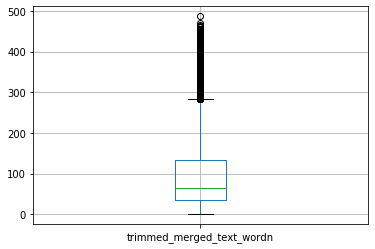

In [6]:
df['trimmed_merged_text'] = df['merged_text'].apply(trim_text)
df['trimmed_merged_text_wordn'] = df['trimmed_merged_text'].apply(lambda x:len(x.split()))
df['merged_text_wordn'] = df['merged_text'].apply(lambda x:len(x.split()))
df.describe()
df[['trimmed_merged_text_wordn']].boxplot()

/media/ragabov/Data/work/env/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,Unnamed: 0,reviewText,overall,summary,text,reviewText_wordn,summary_wordn,text_wordn,norm_text,stem_norm_text,stemmed_text_wordn,normalized_overall
0,0,I enjoy vintage books and movies so I enjoyed reading this book. The plot was unusual. Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.,5,Nice vintage story,Nice vintage story. I enjoy vintage books and movies so I enjoyed reading this book. The plot was unusual. Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.,53,3,56,nice vintag stori . i enjoy vintag book and movi so i enjoy read thi book . the plot wa unusu . dont think kill someon in self defens but leav the scene and the bodi without notifi the polic or hit someon in the jaw to knock them out would wash today . still it wa a good read for me .,nice vintag stori . i enjoy vintag book and movi so i enjoy read thi book . the plot wa unusu . dont think kill someon in self defen but leav the scene and the bodi without notifi the polic or hit someon in the jaw to knock them out would wash today . still it wa a good read for me .,63,Positive
1,1,"This book is a reissue of an old one; the author was born in 1910. It's of the era of, say, Nero Wolfe. The introduction was quite interesting, explaining who the author was and why he's been forgotten; I'd never heard of him.The language is a little dated at times, like calling a gun a &#34;heater.&#34; I also made good use of my Fire's dictionary to look up words like &#34;deshabille&#34; and &#34;Canarsie.&#34; Still, it was well worth a look-see.",4,Different...,"Different.... This book is a reissue of an old one; the author was born in 1910. It's of the era of, say, Nero Wolfe. The introduction was quite interesting, explaining who the author was and why he's been forgotten; I'd never heard of him.The language is a little dated at times, like calling a gun a &#34;heater.&#34; I also made good use of my Fire's dictionary to look up words like &#34;deshabille&#34; and &#34;Canarsie.&#34; Still, it was well worth a look-see.",80,1,81,"differ . . thi book is a reissu of an old one ; the author wa born in 1910 . it of the era of , say , nero wolf . the introduct wa quit interest , explain who the author wa and whi he been forgotten ; id never heard of him . the languag is a littl date at time , like call a gun a ; heater . ; i also made good use of my fire dictionari to look up word like ; deshabil ; and ; canarsi . ; still , it wa well worth a look see .","differ . . thi book is a reissu of an old one ; the author wa born in 1910 . it of the era of , say , nero wolf . the introduct wa quit interest , explain who the author wa and whi he been forgotten ; id never heard of him . the languag is a littl date at time , like call a gun a ; heater . ; i also made good use of my fire dictionari to look up word like ; deshabil ; and ; canarsi . ; still , it wa well worth a look see .",104,Positive
2,2,"This was a fairly interesting read. It had old- style terminology.I was glad to get to read a story that doesn't have coarse, crasslanguage. I read for fun and relaxation......I like the free ebooksbecause I can check out a writer and decide if they are intriguing,innovative, and have enough of the command of Englishthat they can convey the story without crude language.",4,Oldie,"Oldie. This was a fairly interesting read. It had old- style terminology.I was glad to get to read a story that doesn't have coarse, crasslanguage. I read for fun and relaxation......I like the free ebooksbecause I can check out a writer and decide if they are intriguing,innovative, and have enough of the command of Englishthat they can convey the story without crude language.",62,1,63,"oldi . thi wa a fairli in